In [3]:
#Advertising.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [5]:
import os
os.getcwd()

'C:\\Users\\Admin\\Desktop\\Durga(Python)\\AWP File'

In [4]:
#To load Dataset
df = pd.read_csv("advertising (3).csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
#To delete unwanted column Unnamed: 0 from dataframe df permanently 
df.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
#How many rows and columns
df.shape

(200, 4)

In [9]:
#To check the null value
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

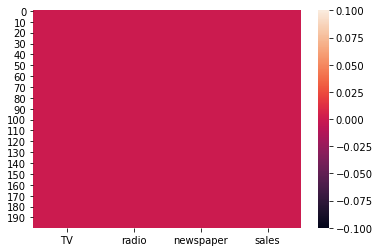

In [12]:
#visualise null value
sb.heatmap(df.isnull())
plt.show()

In [13]:
#cross check for null value : to check datatype
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [14]:
#to show all details of given dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
#statistical opration
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


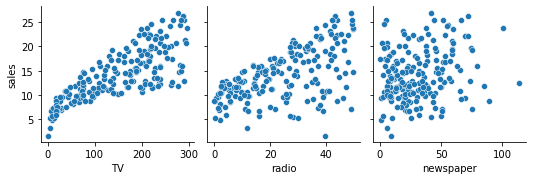

In [16]:
#to check relation between each input with output, use pairplot
sb.pairplot(data=df,x_vars=["TV","radio","newspaper"],y_vars="sales",
           kind='scatter')
plt.show()

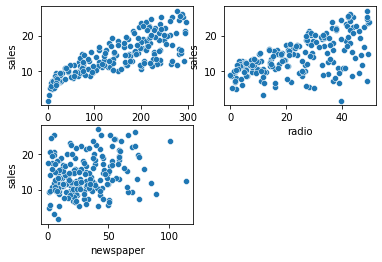

In [17]:
# another method
col = ["TV","radio","newspaper"]
y = df["sales"]
for i,v in enumerate(col):
    plt.subplot(2,2,i+1)
    sb.scatterplot(data=df,x=v,y="sales")


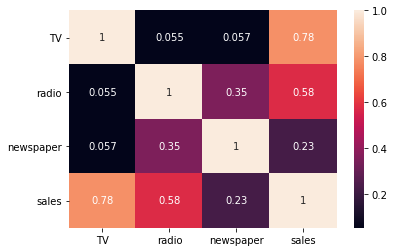

In [18]:
#check correlation between input and output
sb.heatmap(df.corr(),annot=True)
plt.show()

In [19]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [20]:
df.corr().style.background_gradient()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [21]:
#Nice upword growth that means as we investment more on TV the sales is also
#increasing that means +ve correlation means good +ve correlation between
#TV(input) with sales(output)

#see the scatter plot radio with sales : - looks better but lot of data is 
#scattered but scatter data overhere +ve correlation, But correlation is less
#as compared to TV

#It is very bed correlation means no +ve corr and no -ve corr means no
#correlation newspaper with sales because data point are scattered

In [22]:
#perform the model : take input TV and output sales
#Simple Linear Regression (SLR)
#select input and output from given dataset

x = df[["TV"]]  
#input means independent variables, input is always in 2D means [[]]

y = df["sales"]
#output means dependent variable, output is always in 1D means []

In [23]:
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [24]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [25]:
#train_test_split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,
                                                random_state=1)

In [26]:
x_train.head(10)

,TV
116,139.2
67,139.3
78,5.4
42,293.6
17,281.4
5,8.7
127,80.2
105,137.9
48,227.2
66,31.5


In [29]:
y_train.head()

116    12.2
67     13.4
78      5.3
42     20.7
17     24.4
Name: sales, dtype: float64

In [30]:
x_train.shape,x_test.shape

((140, 1), (60, 1))

In [31]:
#perform the model with LinearRegression
#call class 
from sklearn.linear_model import LinearRegression 

In [32]:
#create object for LinearRegression class
lr = LinearRegression()

In [33]:
#train the model with 70% data, use fit() inbuilt method of 
#LinearRegression class
lr.fit(x_train,y_train)

LinearRegression()

In [35]:
#To check the slpoe and intercept
m = lr.coef_
c = lr.intercept_
print("Slope of TV :",m)
print("Intercept :",c)

Slope of TV : [0.04812204]
Intercept : 6.923519536059554


In [36]:
#Test the model with 30% data
y_pred = lr.predict(x_test)  # y_pred=m*x_test+c

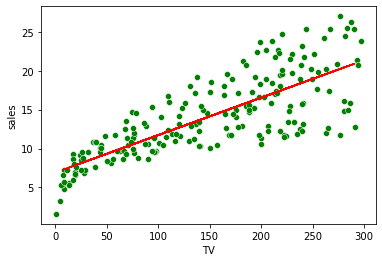

In [43]:
#visualisation : best fit line
sb.scatterplot(data=df,x="TV",y="sales",color="green")
plt.plot(x_test,y_pred,color="red")
plt.show()

In [50]:
#Method 2 :
dict = {"y_test":y_test,"y_pred":y_pred}
df1 = pd.DataFrame(dict)
df1["x_test"] = x_test
df1.head()

,y_test,y_pred,x_test
58,23.8,17.067646,210.8
40,16.6,16.668233,202.5
34,9.5,11.528799,95.7
102,14.8,20.407316,280.2
184,17.6,19.136894,253.8


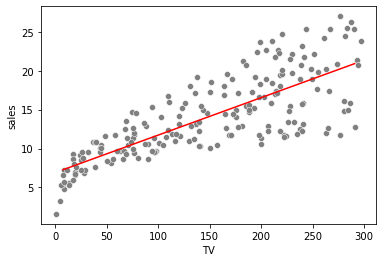

In [52]:
#Method 2 : visualisation : best fit line
sb.scatterplot(data=df,x="TV",y="sales",color="grey")
sb.lineplot(data=df1,x="x_test",y="y_pred",color="red")
plt.show()

In [53]:
#Evaluation the model
#Find the mean squared error
from sklearn.metrics import mean_squared_error

In [54]:
print("Mean Squared Error :",mean_squared_error(y_test,y_pred))

Mean Squared Error : 10.571057434656955


In [55]:
#find the r2_score (range of r2_score is 0 to 1)
from sklearn.metrics import r2_score

In [56]:
print("r2 score :",r2_score(y_test,y_pred))

r2 score : 0.575061860494331


In [57]:
#Perform the model with radio input and output sales
#Select input and output from given dataframe
x = df[["radio"]]  #select input
y = df["sales"]  #select output

In [58]:
#train_test_split
#from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,
                                                random_state=1)

In [61]:
x_train.shape,x_test.shape

((140, 1), (60, 1))

In [62]:
#create object for LinearRegression class
lr = LinearRegression()

In [63]:
#train the model with 70% data, use fit() inbuilt method of 
#LinearRegression class
lr.fit(x_train,y_train)

LinearRegression()

In [64]:
#To check the slpoe and intercept
m = lr.coef_
c = lr.intercept_
print("Slope of radio :",m)
print("Intercept :",c)

Slope of TV : [0.1874808]
Intercept : 9.440936561425886


In [65]:
#Test the model with 30% data
y_pred = lr.predict(x_test)  # y_pred=m*x_test+c

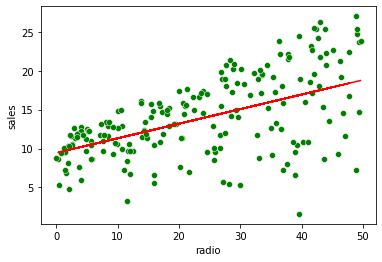

In [73]:
#visualisation : best fit line
sb.scatterplot(data=df,x="radio",y="sales",color="green")
plt.plot(x_test,y_pred,color="red")
plt.show()

In [67]:
#Method 2 :
dict = {"y_test":y_test,"y_pred":y_pred}
df1 = pd.DataFrame(dict)
df1["x_test"] = x_test
df1.head()

,y_test,y_pred,x_test
58,23.8,18.739984,49.6
40,16.6,13.621758,22.3
34,9.5,9.703410,1.4
102,14.8,11.334493,10.1
184,17.6,13.434278,21.3


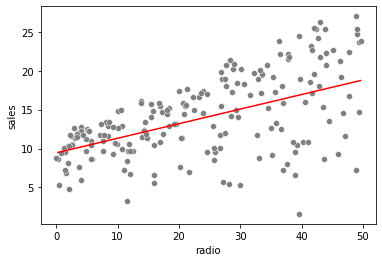

In [72]:
#Method 2 : visualisation : best fit line
sb.scatterplot(data=df,x="radio",y="sales",color="grey")
sb.lineplot(data=df1,x="x_test",y="y_pred",color="red")
plt.show()

In [69]:
print("Mean Squared Error :",mean_squared_error(y_test,y_pred))

Mean Squared Error : 14.604130559272193


In [71]:
print("r2 score :",r2_score(y_test,y_pred))

r2 score : 0.41293932917162335


In [74]:
#Perform the model with newspaper input and output sales
#Select input and output from given dataframe
x = df[["newspaper"]]  #select input
y = df["sales"]    #select output

In [75]:
#train_test_split
#from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,
                                                random_state=1)

In [76]:
x_train.shape,x_test.shape

((140, 1), (60, 1))

In [77]:
#create object for LinearRegression class
lr = LinearRegression()

In [78]:
#train the model with 70% data, use fit() inbuilt method of 
#LinearRegression class
lr.fit(x_train,y_train)

LinearRegression()

In [81]:
#To check the slpoe and intercept
m = lr.coef_
c = lr.intercept_
print("Slope of newspaper :",m)
print("Intercept :",c)

Slope of newspaper : [0.06532045]
Intercept : 11.829668884877877


In [80]:
#Test the model with 30% data
y_pred = lr.predict(x_test)  # y_pred=m*x_test+c

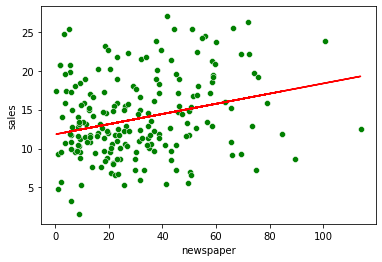

In [82]:
#visualisation : best fit line
sb.scatterplot(data=df,x="newspaper",y="sales",color="green")
plt.plot(x_test,y_pred,color="red")
plt.show()

In [83]:
#Method 2 :
dict = {"y_test":y_test,"y_pred":y_pred}
df1 = pd.DataFrame(dict)
df1["x_test"] = x_test
df1.head()

,y_test,y_pred,x_test
58,23.8,14.292250,37.7
40,16.6,13.893795,31.6
34,9.5,12.313040,7.4
102,14.8,13.227526,21.4
184,17.6,13.789282,30.0


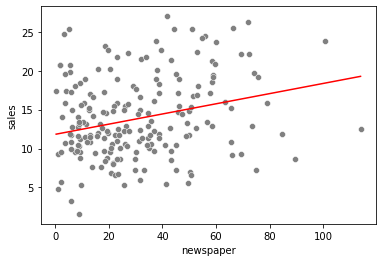

In [85]:
#Method 2 : visualisation : best fit line
sb.scatterplot(data=df,x="newspaper",y="sales",color="grey")
sb.lineplot(data=df1,x="x_test",y="y_pred",color="red")
plt.show()

In [86]:
#Find Mean Squared error
print("Mean Squared Error :",mean_squared_error(y_test,y_pred))

Mean Squared Error : 25.49745237441493


In [87]:
print("r2 score :",r2_score(y_test,y_pred))

r2 score : -0.024953278429509007


In [ ]:
''' 
slope of TV : 0.04812204  and MSE of TV  :  10.57 , r2-score=0.578
slope of radio :0.1874808 and MSE of radio : 14.60 , r2-score=0.41
slope of newspaper : 0.06532045 and MSE of newspaper :25.49 , r2=-0.02
'''

In [88]:
#Multiple Linear Regression (MLR) : means many input and only one output
#Equation of MLR : y_pred = m1*x1 + m2*x2 +....+ Mn*Xn +c

#select input and output from given dataset df 
x = df.drop("sales",axis=1)  #or x=df[["TV","radio","newspaper"]]

#select output
y = df["sales"]

In [89]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [90]:
#train_test_split
#from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,
                                                random_state=1)

In [91]:
x_train.shape,x_test.shape

((140, 3), (60, 3))

In [92]:
#create object for LinearRegression class
lr = LinearRegression()

In [93]:
#train the model with 70% data, use fit() inbuilt method of 
#LinearRegression class
lr.fit(x_train,y_train)

LinearRegression()

In [94]:
#To check the slpoe and intercept
m = lr.coef_
c = lr.intercept_
print("Slope of newspaper :",m)
print("Intercept :",c)

Slope of newspaper : [0.04695205 0.17658644 0.00185115]
Intercept : 2.9372157346906107


In [99]:
x.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [95]:
#Test the model with 30% data
y_pred = lr.predict(x_test)  # y_pred= m1*x1 + m2*x2 +....+ Mn*Xn +c

In [100]:
#Find Mean Squared error
print("Mean Squared Error :",mean_squared_error(y_test,y_pred))

Mean Squared Error : 1.9289249074665724


In [101]:
print("r2 score :",r2_score(y_test,y_pred))

r2 score : 0.9224605706201435
